In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Pour Leroy Merlin
lm_visites = pd.read_excel('DATA Leroy Merlin.xlsx', sheet_name='VISITES ANNUELLES 22 23')
lm_pp = pd.read_excel('DATA Leroy Merlin.xlsx', sheet_name='PP 22 23')
lm_merchandising = pd.read_excel('DATA Leroy Merlin.xlsx', sheet_name='Données brutes MERCH 22 23')
lm_ca_sell = pd.read_excel('DATA Leroy Merlin.xlsx', sheet_name='CA SELL IN LM 22 23')

# Pour Bricomarché
bm_visites = pd.read_excel('DATA Bricomarché.xlsx', sheet_name='VISITES ANNUELLES 22 23')
bm_pp = pd.read_excel('DATA Bricomarché.xlsx', sheet_name='PP 22 23')
bm_merchandising = pd.read_excel('DATA Bricomarché.xlsx', sheet_name='Données brutes MERCH 22 23')
bm_ca_sell = pd.read_excel('DATA Bricomarché.xlsx', sheet_name='Données brutes SELL IN 22 23')

In [33]:
lm_visites['Chaine'] = 'Leroy Merlin'
bm_visites['Chaine'] = 'Bricomarché'

lm_ca_sell['Chaine'] = 'Leroy Merlin'
bm_ca_sell['Chaine'] = 'Bricomarché'

In [34]:
lm_visites.rename(columns={'CODE INTERNE UNIQUE DU POINT DE VENTE': 'Code Point Vente'}, inplace=True)
bm_visites.rename(columns={'CODE INTERNE UNIQUE DU POINT DE VENTE': 'Code Point Vente'}, inplace=True)

lm_ca_sell.rename(columns={'Code du Point de Vente': 'Code Point Vente'}, inplace=True)
bm_ca_sell.rename(columns={'Code du Point de Vente': 'Code Point Vente'}, inplace=True)

In [35]:
# visites annuelles
visites = pd.concat([lm_visites, bm_visites], ignore_index=True)

# données de CA Sell
ca_sell = pd.concat([lm_ca_sell, bm_ca_sell], ignore_index=True)

In [36]:
# Fusion visites et  ventes
data = pd.merge(visites, ca_sell, on=['Code Point Vente', 'Chaine'], how='inner')

In [37]:
visites_totales = visites.groupby('Chaine')[['Total visites annuelles\n2022', 'Total visites annuelles\n2023']].sum()
print(visites_totales)

              Total visites annuelles\n2022  Total visites annuelles\n2023
Chaine                                                                    
Bricomarché                            2219                           2270
Leroy Merlin                           7398                           7583


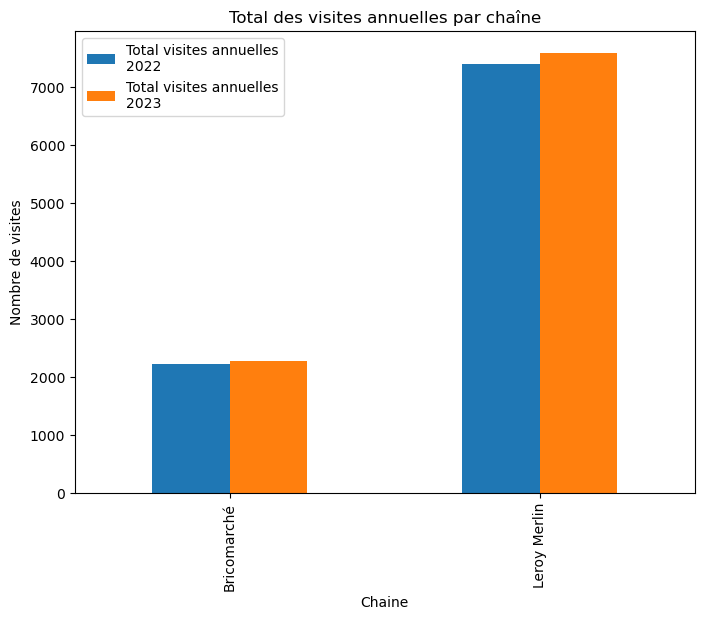

In [38]:
visites_totales.plot(kind='bar', figsize=(8,6))
plt.title('Total des visites annuelles par chaîne')
plt.ylabel('Nombre de visites')
plt.show()

In [40]:
# Charger les données de ventes (CA Sell)
ca_sell = data[['Code Point Vente', 'Chaine', 'Total\nannuel\n2022', 'Total\nannuel\n2023']]

# Charger les données d'investissements (publicité, merchandising, visites)
# Supposons que ces données sont dans les feuilles 'PP' et 'Merchandising'
pp = pd.concat([lm_pp, bm_pp], ignore_index=True)
merchandising = pd.concat([lm_merchandising, bm_merchandising], ignore_index=True)
visites = data[['Code Point Vente', 'Total visites annuelles\n2022', 'Total visites annuelles\n2023']]

In [41]:
# Fusionner les données de ventes avec les données PP (publicité)
data_merged = pd.merge(ca_sell, pp, left_on='Code Point Vente', right_on='CODE DU POINT DE VENTE', how='left')

# Fusionner avec les données de merchandising
data_merged = pd.merge(data_merged, merchandising, left_on='Code Point Vente', right_on='CODE STATIGEST', how='left')

# Fusionner avec les données de visites
data_merged = pd.merge(data_merged, visites, on='Code Point Vente', how='left')

In [46]:
# Renommer les colonnes pour simplifier
data_merged.rename(columns={
    'Total\nannuel\n2022': 'Ventes 2022',
    'Total\nannuel\n2023': 'Ventes 2023',
    'BUDGET\nACCORD\nHT €': 'Budget Publicité',
    'BUDGET ESTIMÉ': 'Budget Merchandising',
    'Total visites annuelles\n2022': 'Visites 2022',
    'Total visites annuelles\n2023': 'Visites 2023'
}, inplace=True)

# Sélectionner les colonnes pour l'analyse
data_corr = data_merged[[
    'Ventes 2022', 'Ventes 2023',
    'Budget Publicité', 'Budget Merchandising',
    'Visites 2022', 'Visites 2023'
]]

In [47]:
# Convertir les colonnes en numérique
for col in data_corr.columns:
    data_corr[col] = pd.to_numeric(data_corr[col], errors='coerce')

# Remplacer les valeurs manquantes par zéro (si cela a du sens pour votre contexte)
data_corr.fillna(0, inplace=True)

/var/folders/_f/2srlysd96rvbypcnm9b8564w0000gn/T/ipykernel_11076/3992643106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr[col] = pd.to_numeric(data_corr[col], errors='coerce')
/var/folders/_f/2srlysd96rvbypcnm9b8564w0000gn/T/ipykernel_11076/3992643106.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr.fillna(0, inplace=True)


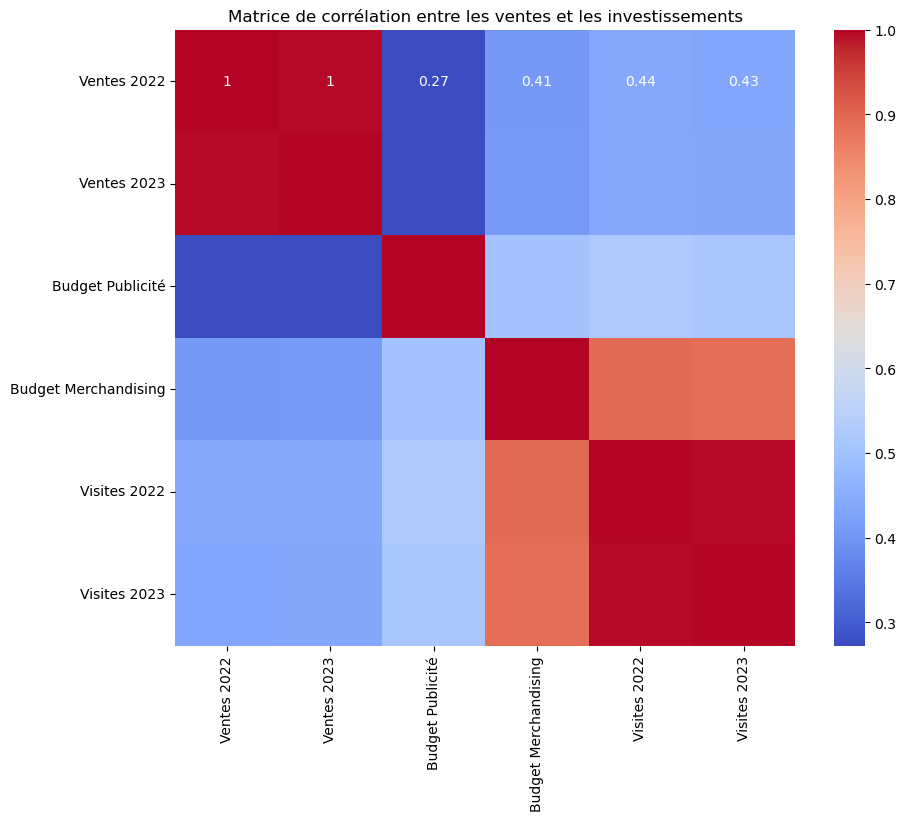

In [48]:
# Calcul de la matrice de corrélation
corr_matrix = data_corr.corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre les ventes et les investissements')
plt.show()

-	Corrélation positive élevée entre les ventes et les visites commerciales : cela suggère que plus il y a de visites, plus les ventes augmentent.
-	Corrélation positive entre les ventes et le budget de publicité : indique que l’investissement en publicité peut avoir un impact sur les ventes.
-	Corrélation entre les ventes et le merchandising : si la corrélation est élevée, cela montre que le merchandising contribue aux ventes.

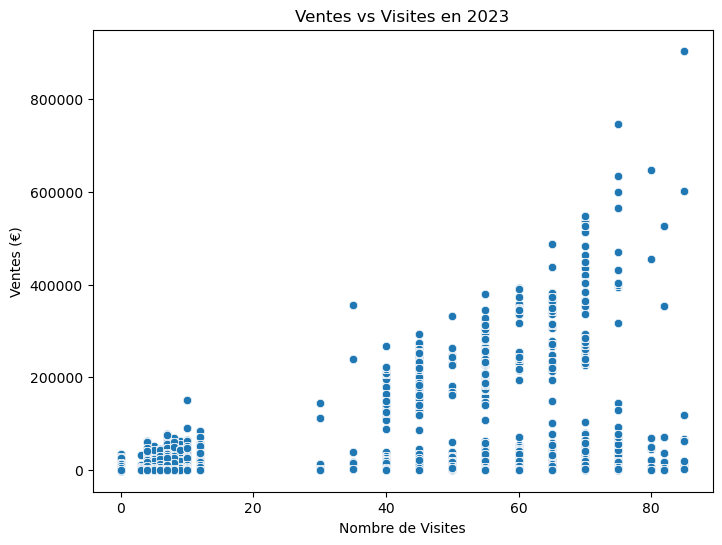

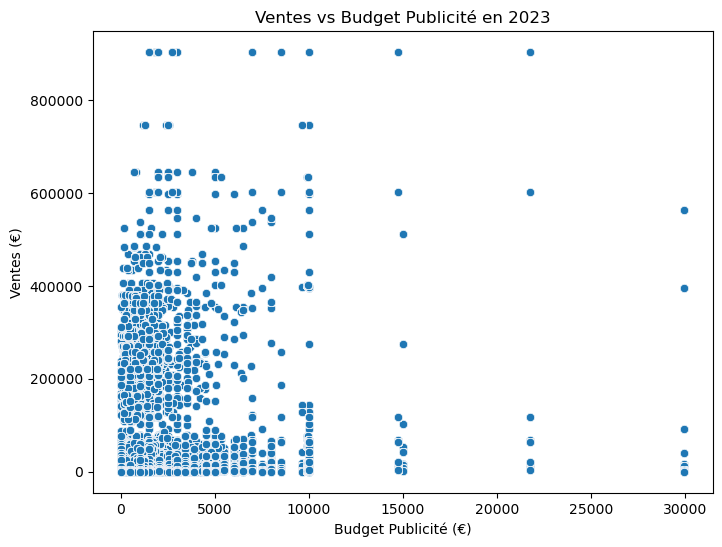

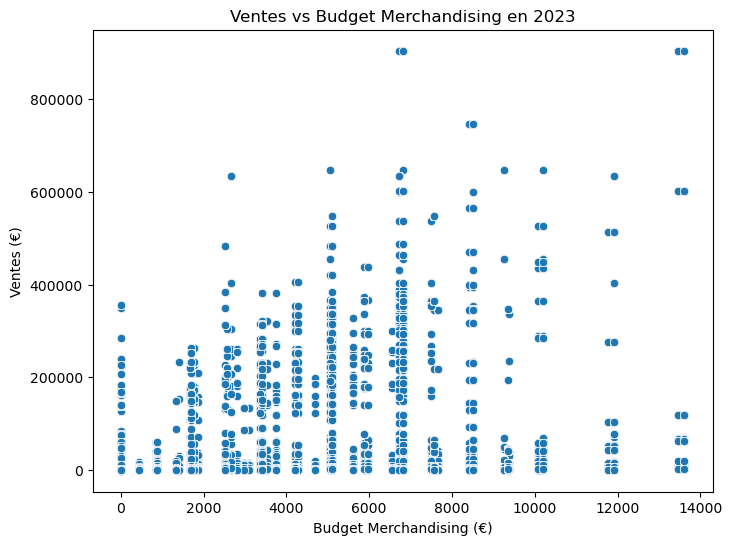

In [49]:
# Relation entre les ventes et les visites
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Visites 2023', y='Ventes 2023', data=data_corr)
plt.title('Ventes vs Visites en 2023')
plt.xlabel('Nombre de Visites')
plt.ylabel('Ventes (€)')
plt.show()

# Relation entre les ventes et le budget de publicité
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Budget Publicité', y='Ventes 2023', data=data_corr)
plt.title('Ventes vs Budget Publicité en 2023')
plt.xlabel('Budget Publicité (€)')
plt.ylabel('Ventes (€)')
plt.show()

# Relation entre les ventes et le merchandising
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Budget Merchandising', y='Ventes 2023', data=data_corr)
plt.title('Ventes vs Budget Merchandising en 2023')
plt.xlabel('Budget Merchandising (€)')
plt.ylabel('Ventes (€)')
plt.show()

In [50]:
import statsmodels.api as sm

# Définir les variables indépendantes et dépendantes
X = data_corr[['Budget Publicité', 'Budget Merchandising', 'Visites 2023']]
y = data_corr['Ventes 2023']

# Ajouter une constante pour l'interception
X = sm.add_constant(X)

# Ajuster le modèle
model = sm.OLS(y, X).fit()

# Résultats du modèle
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Ventes 2023   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                 2.177e+04
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:41:49   Log-Likelihood:            -3.5664e+06
No. Observations:              270139   AIC:                         7.133e+06
Df Residuals:                  270135   BIC:                         7.133e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8941.8224 

In [51]:
# Variables de ventes
ventes = data_merged[['Ventes 2023']]

# Variables d'investissement
investissements = data_merged[['Budget Publicité', 'Budget Merchandising', 'Visites 2023']]

In [52]:
# Combiner les données pour faciliter le traitement
df = pd.concat([ventes, investissements], axis=1)

# Convertir en numérique
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Supprimer les lignes avec des valeurs manquantes
df.dropna(inplace=True)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Variables indépendantes (X) et dépendante (y)
X = df[['Budget Publicité', 'Budget Merchandising', 'Visites 2023']]
y = df['Ventes 2023']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
print('Coefficient de détermination R^2 :', r2_score(y_test, y_pred))
print('Erreur quadratique moyenne (MSE) :', mean_squared_error(y_test, y_pred))

# Afficher les coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coefficients)

Coefficient de détermination R^2 : 0.09282294247243972
Erreur quadratique moyenne (MSE) : 29422238853.114193
               Variable  Coefficient
0      Budget Publicité     2.999597
1  Budget Merchandising     4.319384
2          Visites 2023  2286.347937


## Segmentation des magasins

In [56]:
# Sélectionner les variables pour la segmentation
variables_segmentation = df[['Ventes 2023', 'Budget Publicité', 'Budget Merchandising', 'Visites 2023']]

In [57]:
# Gérer les valeurs manquantes en les remplaçant par la moyenne de la colonne
variables_segmentation.fillna(variables_segmentation.mean(), inplace=True)

# Standardiser les données pour que chaque variable ait le même poids
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
variables_scaled = scaler.fit_transform(variables_segmentation)

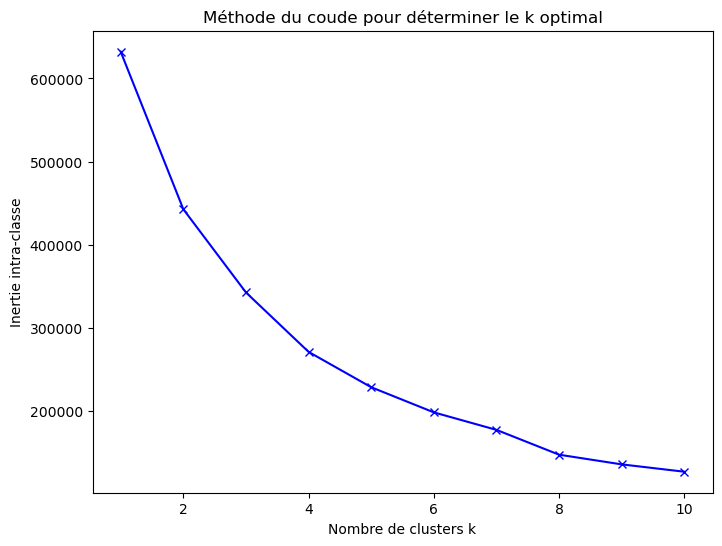

In [58]:
from sklearn.cluster import KMeans

# Calculer l'inertie pour différents nombres de clusters
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(variables_scaled)
    inertias.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Nombre de clusters k')
plt.ylabel("Inertie intra-classe")
plt.title("Méthode du coude pour déterminer le k optimal")
plt.show()

In [60]:
# Appliquer K-Means avec k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(variables_scaled)
clusters = kmeans.labels_

# Ajouter les clusters au DataFrame original
df['Segment'] = clusters

In [63]:
# Calculer les statistiques descriptives par segment
segment_summary = df.groupby('Segment').mean()
print(segment_summary)


           Ventes 2023  Budget Publicité  Budget Merchandising  Visites 2023
Segment                                                                     
0        415278.827053       6513.864990           8134.333268     75.503572
1         77051.391128       2249.919434           6611.327263     65.980655
2         55891.909391       1466.105157           3250.055440     37.847676


-	Segment 0 : Par exemple, magasins avec des ventes élevées et des investissements importants.
-	Segment 1 : Magasins avec des ventes moyennes et des investissements modérés.
-	Segment 2 : Magasins avec des ventes faibles et peu d’investissements.

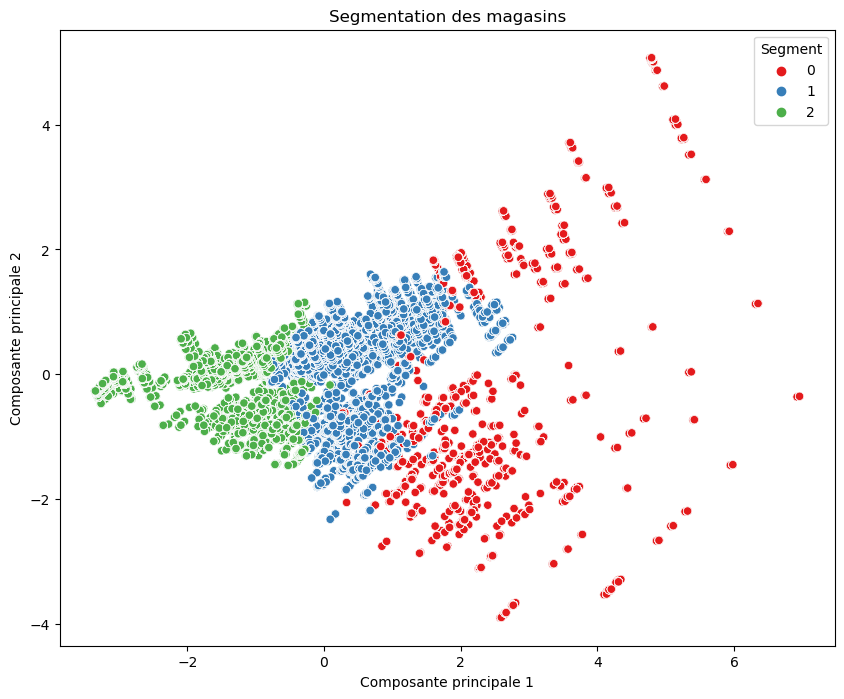

In [64]:
# Réduction de dimension avec PCA pour visualiser en 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(variables_scaled)

# Ajouter les composantes au DataFrame
df['Composante 1'] = components[:, 0]
df['Composante 2'] = components[:, 1]

# Visualisation des segments
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Composante 1', y='Composante 2', hue='Segment', palette='Set1')
plt.title('Segmentation des magasins')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend(title='Segment')
plt.show()

En fonction des caractéristiques de chaque segment, on peut identifier des actions spécifiques.

Segment 0 : Magasins performants

-	Tendances : Ventes élevées, investissements importants.
-	Opportunités : Consolider les stratégies actuelles, explorer de nouvelles initiatives pour augmenter encore les ventes.

Segment 1 : Magasins moyens

-	Tendances : Ventes et investissements moyens.
-	Opportunités : Identifier les leviers qui pourraient les faire passer au segment supérieur, optimiser les dépenses pour un meilleur rendement.

Segment 2 : Magasins en difficulté

-	Tendances : Ventes faibles, faibles investissements.
-	Opportunités : Analyser les obstacles spécifiques, envisager d’augmenter les investissements ou de revoir les stratégies locales.